In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

## SKU

In [2]:
df_sku = pd.read_csv("DATA_2.01_SKU.csv")

In [112]:
df_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
ADS    100 non-null int64
CV     100 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


Text(0.8,2,'cricket')

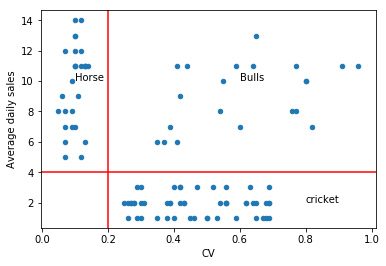

In [64]:
ax =df_sku.plot.scatter(x="CV", y="ADS")
ax.axhline(y=4, color="r")
ax.axvline(x=0.2, color="r")
# ADS (Average daily sales)
plt.xlabel("CV")
plt.ylabel("Average daily sales")
ax.text(0.1, 10, "Horse")
ax.text(0.6, 10, "Bulls")
ax.text(0.8, 2, "cricket")

In [128]:
# 轉成array才能進行分類的演算法
x = df_sku["CV"].values
y = df_sku["ADS"].values

In [133]:
# 將資料變形後合併
x = x.reshape(100,1)
y = y.reshape(100,1)
X = np.hstack((x,y))  #v/h垂直水平合併
print(X.shape)

(100, 2)


In [174]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [260]:
# Hierarchical Clustering 演算法
from sklearn import cluster
hclust = cluster.AgglomerativeClustering(linkage = 'average', affinity = 'euclidean', n_clusters = 3)
hclust.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x00000159BEE29D90>)

In [261]:
# 看分群的績效
from sklearn import metrics
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print(silhouette_avg)

0.455785784839


[2 2 2 2 1 2 2 0 0 1 2 2 1 2 1 2 0 2 2 1 1 2 2 1 2 1 1 1 2 2 2 0 1 2 0 2 2
 2 1 2 2 1 1 1 2 2 2 2 0 1 0 1 1 2 1 1 0 0 2 2 0 2 1 2 2 1 2 2 2 0 2 0 1 2
 2 0 2 2 0 0 2 0 2 0 2 1 0 2 2 1 0 1 2 1 0 2 2 2 0 1]


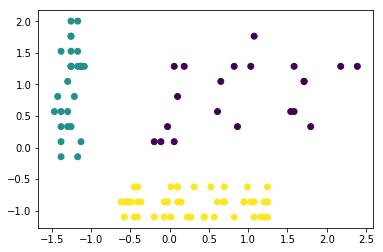

In [262]:
# 印/畫出分群結果
print(hclust.labels_)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hclust.labels_)

## HR Example

In [196]:
df_hr = pd.read_csv("DATA_2.02_HR.csv")
df_hr.info()
#S - Satisfaction
#LPE - Last project evaluation
#NP - Number of projects in last 12 months
#ANH - Average working hours per month
#TIC - Time spent in the company 
#Newborn - Have newborn baby

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
S          2000 non-null float64
LPE        2000 non-null float64
NP         2000 non-null int64
ANH        2000 non-null int64
TIC        2000 non-null int64
Newborn    2000 non-null int64
dtypes: float64(2), int64(4)
memory usage: 93.8 KB


In [165]:
# 需要特別注意不同參數對於商業的實質意義
# 1. S是滿意度, 代表所有變數的綜合體，不能作為分析的一環
# 2. 以商業背景為核心，並是actionable!
# 3. 分類clustering的方式是相當重要的!

In [178]:
from sklearn import preprocessing
HR_scaled = preprocessing.scale(df_hr)

In [192]:
from sklearn import cluster
HR_hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 4)
HR_hclust.fit(HR_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000159BEE29D90>)

In [203]:
index = HR_hclust.labels_
index = index.reshape(2000,1)
index

array([[0],
       [3],
       [2],
       ..., 
       [0],
       [3],
       [0]], dtype=int64)

In [215]:
df_hr["Group"] = index

# 小技巧: 將欄位調整到前面
cols = list(df_hr.columns.values)
cols  # 為了方便我們複製貼上(就不用自己打欄位的名稱)
df_hr = df_hr[['Group', 'S', 'LPE', 'NP', 'ANH', 'TIC', 'Newborn']]

In [224]:
# 產出好的表格，以分類群並取平均
df_hr.set_index("Group")
df_hr.groupby("Group").mean()

,S,LPE,NP,ANH,TIC,Newborn
Group,,,,,,
0,0.423801,0.547759,2.356021,154.633508,3.115183,0.0
1,0.445524,0.719524,3.780952,204.352381,3.866667,1.0
2,0.102857,0.871513,6.237395,276.735294,4.115546,0.0
3,0.817759,0.923556,4.607759,247.780172,5.206897,0.0


In [253]:
# 計算各類別的比重
final_table = df_hr.groupby("Group").mean()
final_table["Percentage"] = final_table.S / final_table.S.sum()
final_table.sort_values(by = "Percentage", ascending = False, inplace = True)
final_table

,S,LPE,NP,ANH,TIC,Newborn,Percentage
Group,,,,,,,
3,0.817759,0.923556,4.607759,247.780172,5.206897,0.0,0.456864
1,0.445524,0.719524,3.780952,204.352381,3.866667,1.0,0.248904
0,0.423801,0.547759,2.356021,154.633508,3.115183,0.0,0.236768
2,0.102857,0.871513,6.237395,276.735294,4.115546,0.0,0.057464


## Telecom

In [284]:
df_tel = pd.read_csv("DATA_2.03_Telco.csv")
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Calls     1000 non-null float64
Intern    1000 non-null float64
Text      1000 non-null float64
Data      1000 non-null float64
Age       1000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 39.1 KB


In [282]:
from sklearn import preprocessing
TEL_scaled = preprocessing.scale(df_tel)

In [283]:
from sklearn import cluster
TEL_hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 5)
TEL_hclust.fit(TEL_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x00000159BEE29D90>)

In [290]:
index1 = TEL_hclust.labels_
index1= index.reshape(1000,1)

In [291]:
df_tel["Group"] = index1

In [294]:
df_tel.groupby("Group").mean()

,Calls,Intern,Text,Data,Age
Group,,,,,
0,3.096327,0.517309,307.609855,2.027891,33.581818
1,1.706024,0.103937,509.418858,3.731220,18.952756
2,1.032308,0.204513,21.886974,0.208974,60.825641
3,5.068098,1.014891,26.084565,2.014783,46.690217
4,2.296522,0.103913,21.401630,0.520435,35.597826


In [299]:
df_tel.Text.min()

17.010000000000002

In [300]:
df_tel[df_tel.Text < 17.05]

,Calls,Intern,Text,Data,Age,Group
253,0.88,0.19,17.01,0.18,63,2
491,4.91,0.86,17.01,2.38,39,3


## Quiz Module 2 

#### 1. 

In [254]:
df_sku = pd.read_csv("DATA_2.01_SKU.csv")

In [256]:
df_sku["CV"].mean()

0.39599999999999985

#### 3. 

In [263]:
df_hr = pd.read_csv("DATA_2.02_HR.csv")
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
S          2000 non-null float64
LPE        2000 non-null float64
NP         2000 non-null int64
ANH        2000 non-null int64
TIC        2000 non-null int64
Newborn    2000 non-null int64
dtypes: float64(2), int64(4)
memory usage: 93.8 KB


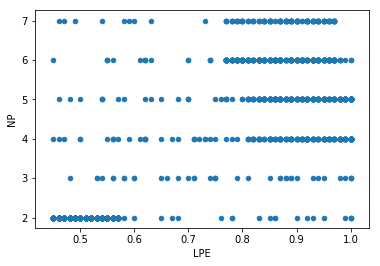

In [271]:
view =df_hr.plot.scatter(x="LPE", y="NP")

In [267]:
eva = df_hr["LPE"].values
np = df_hr["NP"].values

#### 5. 

In [273]:
df_test = df_hr[["S", "LPE", "NP"]]

In [275]:
from sklearn import preprocessing
test_scaled = preprocessing.scale(df_test)

In [276]:
from sklearn import cluster
test_hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2)
test_hclust.fit(test_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x00000159BEE29D90>)

In [277]:
index = test_hclust.labels_
index = index.reshape(2000,1)
index

array([[1],
       [0],
       [0],
       ..., 
       [1],
       [0],
       [1]], dtype=int64)

In [279]:
df_test["group"] = index

C:\Users\Haowei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [280]:
df_test.groupby("group").median()

,S,LPE,NP
group,,,
0,0.64,0.90,5
1,0.41,0.52,2
